In [1]:
import numpy as np
import scipy.stats as sps

import matplotlib.pyplot as plt

# Student's t-test
The Student's t-test is used to test if (blah) and it comes in many different flavours. In general, any statistical test using (...) is called t-test.

## 1-sample Student's t-test
The 1-sample t-test test statistic is defined as 
\begin{equation}
t=\frac{\bar{X}-\mu}{s/\sqrt{N}}
\end{equation}
where  
$\mu$ is the known population mean,  
$N$ is the sample size,  
$\bar{X}=\frac{1}{N}\sum_i^N x_i$ is the sample mean,  
$s^2=\frac{1}{N-1}\sum_i^N (x_i-\bar{X})^2$ is the sample variance

In [2]:
def print_outcome(pval, alpha=0.05):
    if pval<= alpha:
        print(f'H0 rejected at {(1-alpha)*100:.0f}% C.L.')
    else:
        print(f'Unable to reject H0 at {(1-alpha)*100:.0f}% C.L.')

    return

In [31]:
alpha = 0.05
population_mean = 10
population_std = 2.1

hehe_factor = 2
my_gaussian = sps.norm(loc=population_mean+population_std*hehe_factor, scale=population_std)

In [32]:
sample_size = 15
samples = my_gaussian.rvs(size=sample_size)

Text(0, 0.5, 'PDF')

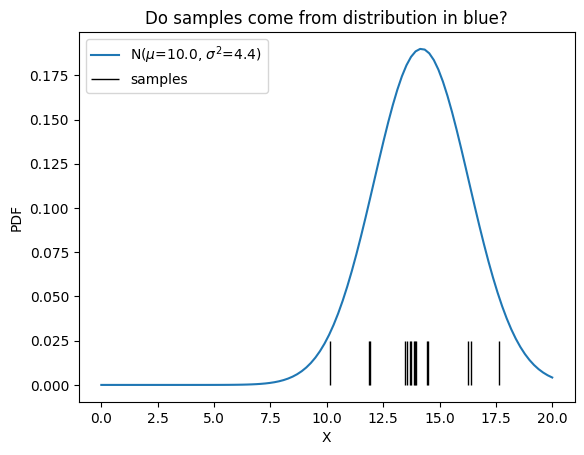

In [33]:
xx = np.linspace(0, 20, 100)
yy = my_gaussian.pdf(xx)
plt.plot(xx, yy, label=f'N($\mu$={population_mean:.1f}, $\sigma^2$={population_std**2:.1f})')
plt.vlines(samples, ymin=0, ymax=0.025, lw=1, color='k', label='samples')
plt.legend()
plt.title('Do samples come from distribution in blue?')
plt.xlabel('X')
plt.ylabel('PDF')

In [34]:
samples

array([11.85577286, 16.39782595, 13.93548113, 13.89387916, 11.9343628 ,
       17.62096532, 13.70849214, 13.88181705, 14.4843405 , 14.46231501,
       10.1267441 , 13.47952307, 13.55072406, 16.24739965, 13.71972479])

## Computing it explicitly

In [35]:
def compute_t(x, pop_mean):
    top = np.mean(x)-pop_mean
    bottom = np.std(x, ddof=1)/np.sqrt(len(x)) # ddof=1 to get np.std to divide by sqrt(N-1), see documentation for details
    return top/bottom 

In [36]:
my_t_ts = compute_t(samples, population_mean)
# 2-tailed test, you either do this x2 and reject H0 if p-value <= alpha, or 
# you don't x2 and you reject H0 if p-value <= alpha/2
# I'm doing this to be consistent with the scipy.stats function..
my_p_value = sps.t.sf(np.abs(my_t_ts), df=sample_size-1)*2 

In [37]:
print(f'Explicit computation: t = {my_t_ts:.3f}, p-value = {my_p_value:.3f}')
print_outcome(my_p_value, alpha)

Explicit computation: t = 8.196, p-value = 0.000
H0 rejected at 95% C.L.


## Using scipy.stats function

In [39]:
scipy_t_ts, scipy_p_value = sps.ttest_1samp(samples, population_mean)

In [40]:
print(f'Explicit computation: t = {scipy_t_ts:.3f}, p-value = {scipy_p_value:.3f}')
print_outcome(scipy_p_value, alpha)

Explicit computation: t = 8.196, p-value = 0.000
H0 rejected at 95% C.L.


In [ ]:
raise

## 2-sample Student's t-test
The 2-sample t-test test statistic is defined as (that long thing in the slides which I'm lazy to type out).

The 2-sample t-test test statistic follow the t-distribution with df = N1+N2-2


In [12]:
def pooled_var(x1, x2):
    n_bag = [len(x) for x in [x1, x2]]
    s2_bag = [np.std(x, ddof=1)**2 for x in [x1, x2]]
    output = 0
    for n, s2 in zip(n_bag, s2_bag):
        output+=(n-1)*s2
    output/=(np.sum(n_bag)-2)
    return output
    
def compute_t_2samp(x1, x2, mu1, mu2):
    x1_mean = np.mean(x1)
    x2_mean = np.mean(x2)
    top = (x1_mean-x2_mean)-(mu1-mu2)
    bottom = pooled_var(x1, x2)*(1/len(x1)+1/len(x2))
    bottom = np.sqrt(bottom)
    return top/bottom

def compute_pval_2samp(t, df, two_tailed=True):
    if two_tailed:
        p = sps.t.sf(abs(t), df)*2
    else:
        p = sps.t.sf(abs(t), df)
    return p

In [41]:
ballet = np.array([89.2, 78.2, 89.3, 88.3, 87.3, 90.1, 95.2, 94.3, 78.3, 89.3])
football = np.array([79.3, 78.3, 85.3, 79.3, 88.9, 91.2, 87.2, 89.2, 93.3, 79.9])

In [42]:
# Pooled variance, computing just for fun
pooled_var(ballet, football)

np.float64(31.781888888888894)

In [43]:
# 2-sample t-tests ts
t2 = compute_t_2samp(ballet, football, 0., 0.) # hehe
print(t2)

1.094722972460392


In [45]:
df = len(ballet)+len(football)-2
pval_2samp = compute_pval_2samp(t2, df)
print(pval_2samp)
print_outcome(pval_2samp, alpha)

0.2880709832314243
Unable to reject H0 at 95% C.L.


In [46]:
# Comparing explicit computation with scipy.stats function
scipy_2samp_res = sps.ttest_ind(ballet, football)
scipy_2samp_res

TtestResult(statistic=np.float64(1.094722972460392), pvalue=np.float64(0.2880709832314243), df=np.float64(18.0))

In [47]:
sps.ttest_ind?

Signature:
sps.ttest_ind(
    a,
    b,
    *,
    axis=0,
    equal_var=True,
    nan_policy='propagate',
    permutations=None,
    random_state=None,
    alternative='two-sided',
    trim=0,
    method=None,
    keepdims=False,
)
Docstring:
Calculate the T-test for the means of *two independent* samples of scores.

This is a test for the null hypothesis that 2 independent samples
have identical average (expected) values. This test assumes that the
populations have identical variances by default.

.. deprecated:: 1.17.0
    Use of argument(s) ``{'alternative', 'method', 'axis', 'trim', 'nan_policy', 'equal_var', 'keepdims'}`` by position is deprecated; beginning in 
    SciPy 1.17.0, these will be keyword-only. Argument(s) ``{'permutations', 'random_state'}`` are deprecated, whether passed by position or keyword; they will be removed in SciPy 1.17.0. Use ``method`` to perform a permutation test.

Parameters
----------
a, b : array_like
    The arrays must have the same shape, except 

In [48]:
print_outcome(scipy_2samp_res.pvalue, alpha)

Unable to reject H0 at 95% C.L.


Cannot conclude that there are any differences in fitness levels between football players and ballet dancers based on this data set.